## Principal Components Analysis using R

In [1]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "3"

$minor
[1] "4.4"

$year
[1] "2018"

$month
[1] "03"

$day
[1] "15"

$`svn rev`
[1] "74408"

$language
[1] "R"

$version.string
[1] "R version 3.4.4 (2018-03-15)"

$nickname
[1] "Someone to Lean On"

In [2]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")

Loading required package: devtools
Skipping install of 'factoextra' from a github remote, the SHA1 (1012e1b5) has not changed since last install.
  Use `force = TRUE` to force installation


In [3]:
install.packages("FactoMineR")
install.packages("tidyverse")

Installing package into ‘/home/david/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/david/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [4]:
library(factoextra)
library(FactoMineR)
library(tidyverse)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.3.0
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.3.1     ✔ stringr 1.3.1
✔ tibble  2.0.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
# Load the data
data <- read.table("asphalt_binder.csv",header=TRUE,sep=",",check.names = TRUE)
rownames(data) <- data[,1]
data
#?read.table

,asp.code,srf.fr.eng,saturates,aromatics,resins,asptenes,wax,carbon,hydrogen,oxygen,nitrogen,sulfur,nickel,vanadium
AAB-1,AAB-1,15.38,8.6,33.4,38.3,17.3,3.85,82.3,10.60,0.80,0.54,4.70,56,220
AAB-2,AAB-2,16.09,10.8,36.5,35.7,16.7,5.05,85.7,10.59,1.06,0.54,5.40,36,163
AAD-1,AAD-1,16.51,8.6,25.1,41.3,20.5,1.94,81.6,10.80,0.90,0.77,6.90,145,310
AAD-2,AAD-2,16.79,10.0,26.7,40.1,21.3,1.41,81.9,10.30,1.17,0.90,8.30,135,266
AAF-1,AAF-1,16.26,9.6,37.7,38.3,13.3,4.19,84.5,10.40,1.10,0.55,3.40,35,87
AAF-2,AAF-2,14.81,11.9,34.6,38.7,13.0,4.20,84.8,10.20,0.82,0.28,4.60,22,102
AAG-1,AAG-1,25.79,8.5,32.5,51.2,5.0,1.13,85.6,10.50,1.10,1.10,1.30,95,37
AAG-2,AAG-2,27.09,6.6,35.3,51.0,5.0,1.11,87.0,10.50,1.93,1.15,2.90,11,33
AAH,AAH,14.48,13.5,28.6,41.4,15.9,4.41,86.3,10.10,1.00,0.80,2.80,43,84
AAK-1,AAK-1,17.02,5.1,30.0,41.8,20.1,1.17,83.7,10.20,0.80,0.70,6.40,142,1480


In [6]:
data_n <- data %>% select(3:14)
data_n

,saturates,aromatics,resins,asptenes,wax,carbon,hydrogen,oxygen,nitrogen,sulfur,nickel,vanadium
AAB-1,8.6,33.4,38.3,17.3,3.85,82.3,10.60,0.80,0.54,4.70,56,220
AAB-2,10.8,36.5,35.7,16.7,5.05,85.7,10.59,1.06,0.54,5.40,36,163
AAD-1,8.6,25.1,41.3,20.5,1.94,81.6,10.80,0.90,0.77,6.90,145,310
AAD-2,10.0,26.7,40.1,21.3,1.41,81.9,10.30,1.17,0.90,8.30,135,266
AAF-1,9.6,37.7,38.3,13.3,4.19,84.5,10.40,1.10,0.55,3.40,35,87
AAF-2,11.9,34.6,38.7,13.0,4.20,84.8,10.20,0.82,0.28,4.60,22,102
AAG-1,8.5,32.5,51.2,5.0,1.13,85.6,10.50,1.10,1.10,1.30,95,37
AAG-2,6.6,35.3,51.0,5.0,1.11,87.0,10.50,1.93,1.15,2.90,11,33
AAH,13.5,28.6,41.4,15.9,4.41,86.3,10.10,1.00,0.80,2.80,43,84
AAK-1,5.1,30.0,41.8,20.1,1.17,83.7,10.20,0.80,0.70,6.40,142,1480


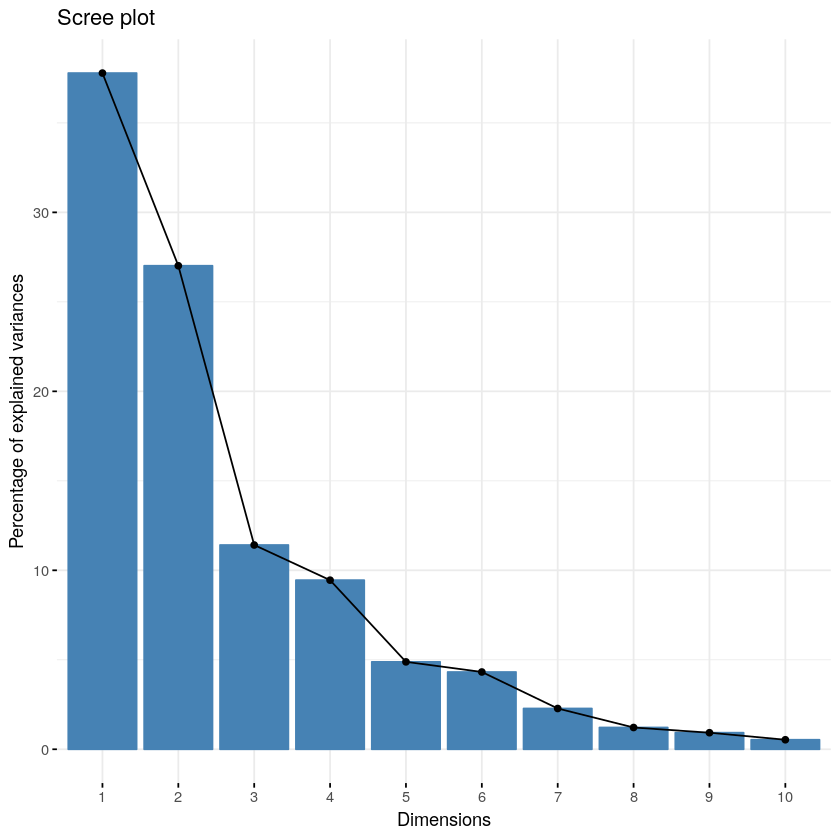

In [7]:
# Compute principal component analysis
library(FactoMineR)
res.pca <- prcomp(data_n, scale = TRUE)
# Percentage of information retained by each dimensions
fviz_eig(res.pca)

In [8]:
print(res.pca$ind)

NULL


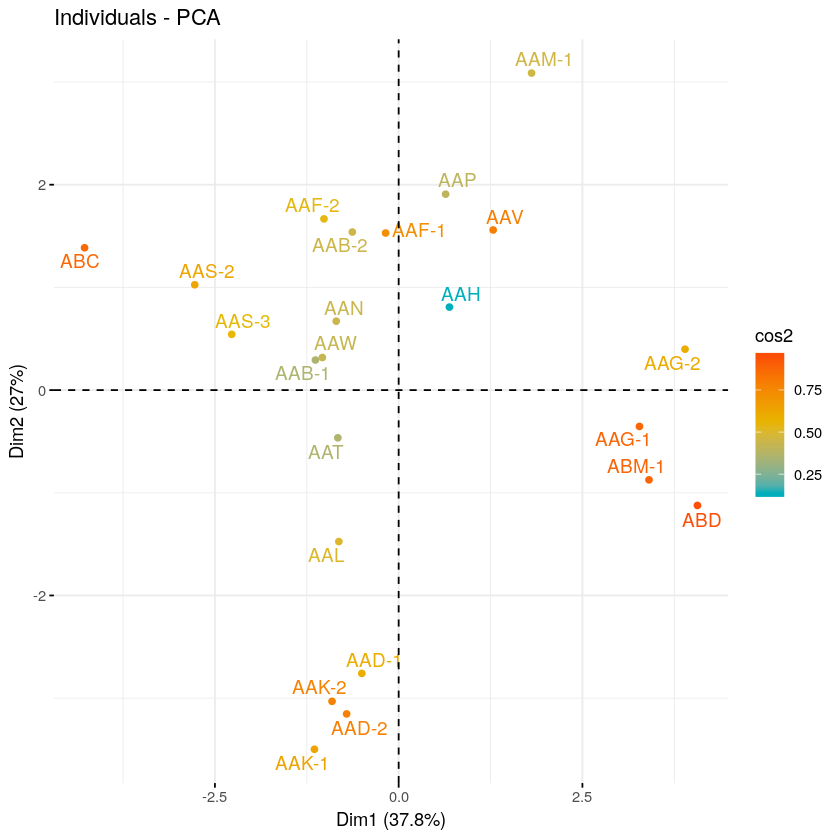

In [9]:
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE,     # Avoid text overlapping
             axes = c(1,2), choix=c("ind", "var")
             )

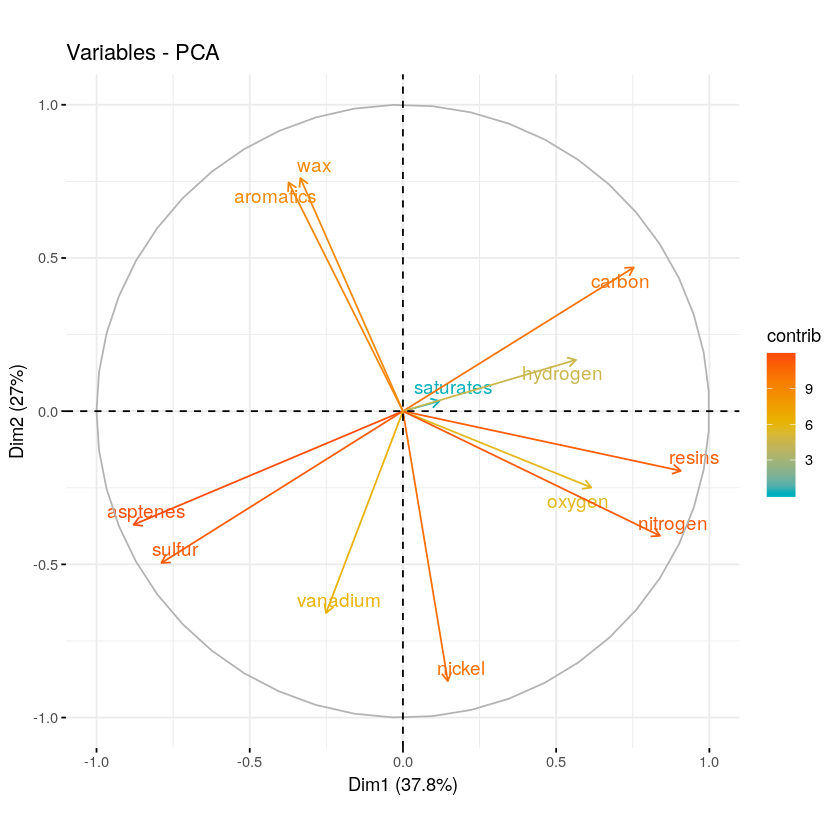

In [10]:
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

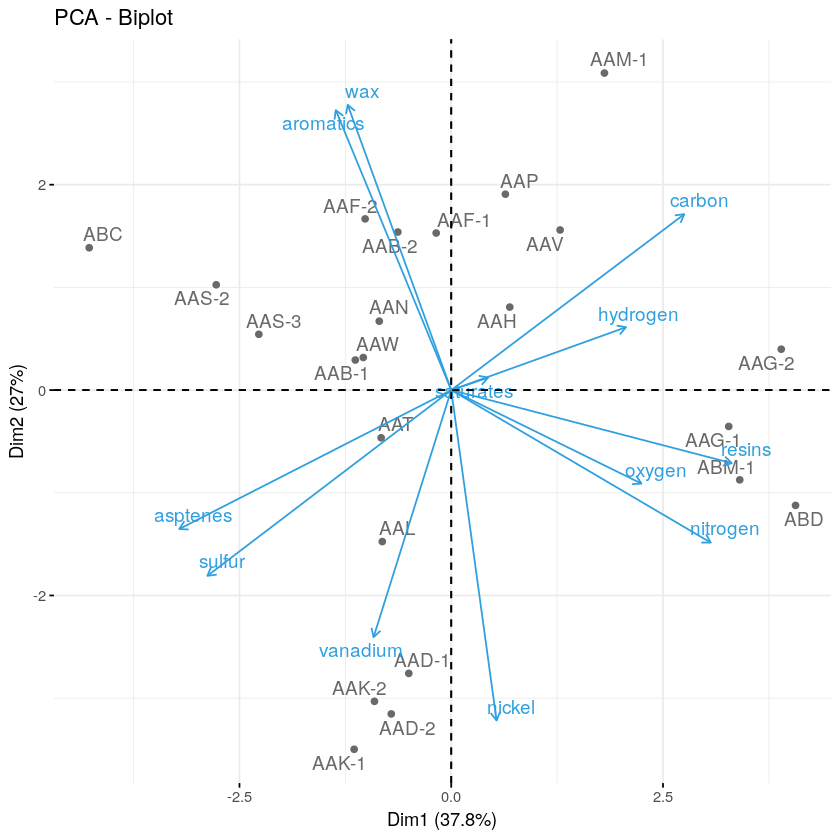

In [11]:
fviz_pca_biplot(res.pca, repel = TRUE,
                gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

In [12]:
# Eigenvalues
eig.val <- get_eigenvalue(res.pca)
eig.val
  
# Results for Variables
res.var <- get_pca_var(res.pca)
res.var$coord          # Coordinates
res.var$contrib        # Contributions to the PCs
res.var$cos2           # Quality of representation 
# Results for individuals
res.ind <- get_pca_ind(res.pca)
res.ind$coord          # Coordinates
res.ind$contrib        # Contributions to the PCs
res.ind$cos2           # Quality of representation 

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.533873173,37.78227644,37.78228
Dim.2,3.241996204,27.01663504,64.79891
Dim.3,1.369640901,11.41367418,76.21259
Dim.4,1.133813570,9.44844642,85.66103
Dim.5,0.585987465,4.88322888,90.54426
Dim.6,0.518161042,4.31800868,94.86227
Dim.7,0.273346644,2.27788870,97.14016
Dim.8,0.145919089,1.21599241,98.35615
Dim.9,0.111028329,0.92523608,99.28139
Dim.10,0.063788594,0.53157162,99.81296


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
saturates,0.1190194,0.03314642,-0.9450415588,0.23600250,-0.10192686,0.037653811,-0.089981434,0.104080039,-0.05894592,0.013236231,0.0379041678,0.0105933016
aromatics,-0.3732205,0.74631490,0.3104184428,-0.33107787,-0.07462502,0.067075216,-0.275275465,-0.027193884,-0.09029787,0.050641143,0.0098022891,0.0187086687
resins,0.9067994,-0.19486615,0.2394430483,0.06054815,0.06624271,0.001816331,0.265497190,0.020714694,-0.01226753,0.048684910,0.0132121028,0.0271730581
asptenes,-0.8791321,-0.37037410,-0.1990571939,0.07625791,0.01072033,-0.026103990,-0.035296536,-0.108960805,0.14914259,-0.072672140,-0.0514732875,0.0205392376
wax,-0.3346026,0.76049421,-0.1490106503,0.37241388,-0.07576819,-0.241225691,0.157197603,-0.226998983,-0.08212364,0.043294138,-0.0003182365,-0.0020787979
carbon,0.7531457,0.46896912,-0.0826727584,-0.01062238,-0.38327361,0.088124652,-0.041840347,-0.022690932,0.19935987,0.093123975,-0.0231114922,-0.0033407137
hydrogen,0.5647395,0.16758834,0.2834458775,0.60661355,0.18156370,-0.329827871,-0.234629701,0.063897923,0.05551098,-0.026090545,0.0028790961,0.0023633994
oxygen,0.6147446,-0.24921632,-0.2698653338,-0.52357685,-0.01895684,-0.451444050,-0.039884237,-0.003095962,-0.06057626,0.009600619,-0.0591362759,0.0002231795
nitrogen,0.8387734,-0.40663799,-0.0883582393,-0.18289550,0.06059825,0.056119554,-0.127548929,-0.240542421,0.02595065,-0.058674228,0.0691314060,-0.0007472203
sulfur,-0.7881598,-0.49514267,-0.0006136663,-0.14339433,0.12681095,-0.247024512,-0.003435569,0.012926522,0.09871925,0.148873257,0.0623263305,-0.0011346625


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
saturates,0.3124396,0.03388915,6.520713e+01,4.912375589,1.77291916,2.736233e-01,2.962047878,7.423740472,3.1294909,0.2746538,6.910091e+00,6.787597177
aromatics,3.0722852,17.18033859,7.035392e+00,9.667599414,0.95034341,8.682792e-01,27.721789568,0.506792721,7.3438058,4.0203510,4.621307e-01,21.170892095
resins,18.1364851,1.17127884,4.185986e+00,0.323340447,0.74883792,6.366859e-04,25.787314160,0.294066095,0.1355441,3.7157433,8.395639e-01,44.661203621
asptenes,17.0466442,4.23125040,2.893004e+00,0.512894682,0.01961229,1.315070e-01,0.455774928,8.136328844,20.0340858,8.2792856,1.274306e+01,25.516554305
wax,2.4693876,17.83936236,1.621168e+00,12.232354827,0.97968272,1.123007e+01,9.040201087,35.313089239,6.0743881,2.9384287,4.870906e-04,0.261383347
carbon,12.5109037,6.78384612,4.990202e-01,0.009951806,25.06856727,1.498753e+00,0.640437573,0.352851980,35.7965906,13.5950239,2.569010e+00,0.675043717
hydrogen,7.0343979,0.86631358,5.865885e+00,32.455071063,5.62561118,2.099471e+01,20.139664328,2.798087996,2.7753902,1.0671446,3.986779e-02,0.337852873
oxygen,8.3352788,1.91575722,5.317255e+00,24.177936310,0.06132583,3.933174e+01,0.581954240,0.006568696,3.3049977,0.1444959,1.681968e+01,0.003012741
nitrogen,15.5174356,5.10039020,5.700165e-01,2.950287915,0.62665979,6.078042e-01,5.951684274,39.652561362,0.6065444,5.3969915,2.298585e+01,0.033771526
sulfur,13.7012170,7.56220093,2.749526e-05,1.813519753,2.74425942,1.177648e+01,0.004318008,0.114512066,8.7774812,34.7448425,1.868327e+01,0.077872986


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
saturates,0.01416562,0.001098685,8.931035e-01,0.0556971810,0.0103890840,1.417809e-03,8.096658e-03,1.083265e-02,0.0034746214,1.751978e-04,1.436726e-03,1.122180e-04
aromatics,0.13929352,0.556985925,9.635961e-02,0.1096125540,0.0055688932,4.499085e-03,7.577658e-02,7.395073e-04,0.0081537049,2.564525e-03,9.608487e-05,3.500143e-04
resins,0.82228523,0.037972815,5.733297e-02,0.0036660779,0.0043880964,3.299058e-06,7.048876e-02,4.290986e-04,0.0001504924,2.370220e-03,1.745597e-04,7.383751e-04
asptenes,0.77287323,0.137176977,3.962377e-02,0.0058152695,0.0001149256,6.814183e-04,1.245845e-03,1.187246e-02,0.0222435107,5.281240e-03,2.649499e-03,4.218603e-04
wax,0.11195890,0.578351451,2.220417e-02,0.1386920990,0.0057408179,5.818983e-02,2.471109e-02,5.152854e-02,0.0067442916,1.874382e-03,1.012745e-07,4.321401e-06
carbon,0.56722850,0.219932034,6.834785e-03,0.0001128349,0.1468986619,7.765954e-03,1.750615e-03,5.148784e-04,0.0397443565,8.672075e-03,5.341411e-04,1.116037e-05
hydrogen,0.31893068,0.028085853,8.034157e-02,0.3679799998,0.0329653764,1.087864e-01,5.505110e-02,4.082945e-03,0.0030814694,6.807165e-04,8.289195e-06,5.585657e-06
oxygen,0.37791097,0.062108776,7.282730e-02,0.2741327228,0.0003593617,2.038017e-01,1.590752e-03,9.584981e-06,0.0036694837,9.217189e-05,3.497099e-03,4.980907e-08
nitrogen,0.70354085,0.165354457,7.807178e-03,0.0334507647,0.0036721478,3.149404e-03,1.626873e-02,5.786066e-02,0.0006734361,3.442665e-03,4.779151e-03,5.583381e-07
sulfur,0.62119580,0.245166267,3.765863e-07,0.0205619331,0.0160810162,6.102111e-02,1.180313e-05,1.670950e-04,0.0097454907,2.216325e-02,3.884571e-03,1.287459e-06


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
AAB-1,-1.1325202,0.2927333,0.1812768,0.9917770859,0.75541565,-0.61644484,0.253495517,0.0755693713,-0.31662606,-0.582415608,0.111146751,0.037327042
AAB-2,-0.6303373,1.5391609,-0.8570839,0.5835652078,-0.36164072,-1.31366419,-0.173745582,-0.2661341992,0.42712002,0.421623487,-0.027944537,0.006937950
AAD-1,-0.5009423,-2.7587990,0.1017671,1.6096752725,1.54493816,-0.58247884,-0.250317678,-0.0320589579,0.13244389,-0.025944254,-0.081946623,-0.090412893
AAD-2,-0.7080090,-3.1535179,-0.8902051,-0.0701868845,1.24654332,-0.49208833,-0.162953980,-0.2690388453,0.14162495,0.347613065,0.167785499,0.027008248
AAF-1,-0.1775858,1.5295521,-0.3931252,-0.1105027501,-0.02260056,-0.63358144,0.131017226,0.0299896312,-0.43795839,-0.145195677,-0.254050419,0.013580193
AAF-2,-1.0163621,1.6672516,-1.0263451,0.3768591143,-0.31677041,-0.13006087,0.980583449,0.9613469734,-0.11620084,0.324232178,0.143795340,-0.052084218
AAG-1,3.2759516,-0.3539568,0.4150752,-0.3224286678,0.40397656,0.92645041,-0.049962124,0.0525015625,-0.38467219,-0.143413241,0.209965572,-0.054124287
AAG-2,3.8961893,0.3981901,0.3103633,-2.7554018405,0.03372631,-1.52005598,-0.024740206,0.1250407617,0.41703581,-0.245040900,-0.031232379,0.009035750
AAH,0.6907939,0.8082221,-2.2146792,0.3684562785,-0.69433217,0.20044016,1.039040575,-0.5642078637,0.36844371,-0.256511746,0.108727211,-0.033020908
AAK-1,-1.1461308,-3.4977397,1.8446942,0.4869065317,-1.98559470,0.10014215,0.170447958,-0.0758527693,0.05296148,-0.060974503,0.022951034,-0.004368108


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
AAB-1,1.22997057,0.1149222,0.10431576,3.771887e+00,4.234048161,3.18856923,1.022113e+00,1.701577e-01,3.92583170,23.120389221,2.583304e+00,3.66414553
AAB-2,0.38102095,3.1770769,2.33191190,1.305898e+00,0.970372506,14.48025242,4.801600e-01,2.110384e+00,7.14394672,12.116542870,1.632961e-01,0.12658664
AAD-1,0.24064575,10.2070391,0.03287607,9.935896e+00,17.709489271,2.84687052,9.966472e-01,3.062378e-02,0.68691378,0.045878743,1.404249e+00,21.49741741
AAD-2,0.48070695,13.3367574,2.51562319,1.889046e-02,11.529184590,2.03185889,4.223654e-01,2.156701e+00,0.78544888,8.236094365,5.886957e+00,1.91830824
AAF-1,0.03024262,3.1375324,0.49059968,4.682488e-02,0.003789851,3.36831195,2.730330e-01,2.679800e-02,7.51110899,1.436932957,1.349652e+01,0.48499519
AAF-2,0.99060312,3.7278802,3.34389206,5.446137e-01,0.744514316,0.14193868,1.529423e+01,2.753724e+01,0.52875791,7.165415154,4.323860e+00,7.13407804
AAG-1,10.29147802,0.1680197,0.54691393,3.986555e-01,1.210866246,7.20197748,3.970454e-02,8.213051e-02,5.79455314,1.401869637,9.218881e+00,7.70388754
AAG-2,14.55736945,0.2126379,0.30577792,2.911390e+01,0.008439592,19.38771250,9.735652e-03,4.658684e-01,6.81059512,4.092665861,2.039821e-01,0.21471086
AAH,0.45761449,0.8760342,15.56994649,5.205979e-01,3.576995611,0.33711407,1.717210e+01,9.485022e+00,5.31594709,4.484805826,2.472057e+00,2.86750099
AAK-1,1.25971169,16.4072066,10.80225018,9.091211e-01,29.252638764,0.08414751,4.621064e-01,1.714364e-01,0.10983951,0.253411119,1.101505e-01,0.05017788


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12
AAB-1,0.332399798,0.022208186,0.0085163464,2.549159e-01,1.478907e-01,9.848209e-02,1.665365e-02,1.479996e-03,2.598138e-02,8.790930e-02,3.201565e-03,3.610904e-04
AAB-2,0.064500603,0.384579199,0.1192516542,5.528362e-02,2.123109e-02,2.801473e-01,4.900555e-03,1.149791e-02,2.961540e-02,2.885807e-02,1.267686e-04,7.814119e-06
AAD-1,0.018887459,0.572846505,0.0007794936,1.950180e-01,1.796472e-01,2.553633e-02,4.716080e-03,7.735653e-05,1.320268e-03,5.066179e-05,5.054291e-04,6.152603e-04
AAD-2,0.037667119,0.747266277,0.0595476926,3.701662e-04,1.167615e-01,1.819579e-02,1.995330e-03,5.438946e-03,1.507177e-03,9.079815e-03,2.115406e-03,5.481225e-05
AAF-1,0.009747271,0.723094485,0.0477670363,3.774094e-03,1.578719e-04,1.240713e-01,5.305463e-03,2.779769e-04,5.928328e-02,6.515892e-03,1.994832e-02,5.700046e-05
AAF-2,0.144411026,0.388602638,0.1472618529,1.985462e-02,1.402790e-02,2.364813e-03,1.344227e-01,1.292004e-01,1.887652e-03,1.469656e-02,2.890634e-03,3.792414e-04
AAG-1,0.867171376,0.010123494,0.0139214195,8.400348e-03,1.318689e-02,6.935445e-02,2.017027e-04,2.227278e-04,1.195671e-02,1.661914e-03,3.562264e-03,2.367088e-04
AAG-2,0.593202876,0.006195896,0.0037641231,2.966833e-01,4.444888e-05,9.029055e-02,2.391827e-05,6.109791e-04,6.796258e-03,2.346391e-03,3.811828e-05,3.190447e-06
AAH,0.057454382,0.078647985,0.5905380142,1.634550e-02,5.804446e-02,4.837218e-03,1.299844e-01,3.832697e-02,1.634438e-02,7.922107e-03,1.423320e-03,1.312817e-04
AAK-1,0.062014893,0.577567328,0.1606484049,1.119229e-02,1.861268e-01,4.734362e-04,1.371549e-03,2.716255e-04,1.324183e-04,1.755190e-04,2.486750e-05,9.007709e-07


In [13]:
# Compute PCA with ncp = 3
res.pca <- PCA(data_n, ncp = 3, graph = FALSE)
# Compute HCPC
res.hcpc <- HCPC(res.pca, graph = FALSE)

In [14]:
# Variable describing clusters
res.hcpc$desc.var


Link between the cluster variable and the quantitative variables
               Eta2      P-value
asptenes  0.8434322 4.856911e-07
resins    0.8425116 5.115135e-07
wax       0.8380302 6.553587e-07
sulfur    0.8044203 3.450086e-06
nitrogen  0.7971894 4.745557e-06
aromatics 0.7429081 3.771423e-05
carbon    0.6979369 1.524389e-04
nickel    0.6610152 4.107270e-04
saturates 0.5937639 1.911443e-03
hydrogen  0.5488678 4.597341e-03
oxygen    0.5394085 5.461935e-03
vanadium  0.4811673 1.452159e-02

Description of each cluster by quantitative variables
$`1`
             v.test Mean in category Overall mean sd in category Overall sd
aromatics  2.901942       43.4333333   34.6217391     2.68369563  5.5159812
saturates -1.978855        5.7666667    8.8173913     1.41970263  2.8005671
nitrogen  -2.150414        0.4066667    0.6995652     0.07717225  0.2474299
hydrogen  -2.412484        9.9333333   10.3647826     0.12472191  0.3248795
resins    -2.580562       30.3000000   40.4043478     5.92339992 

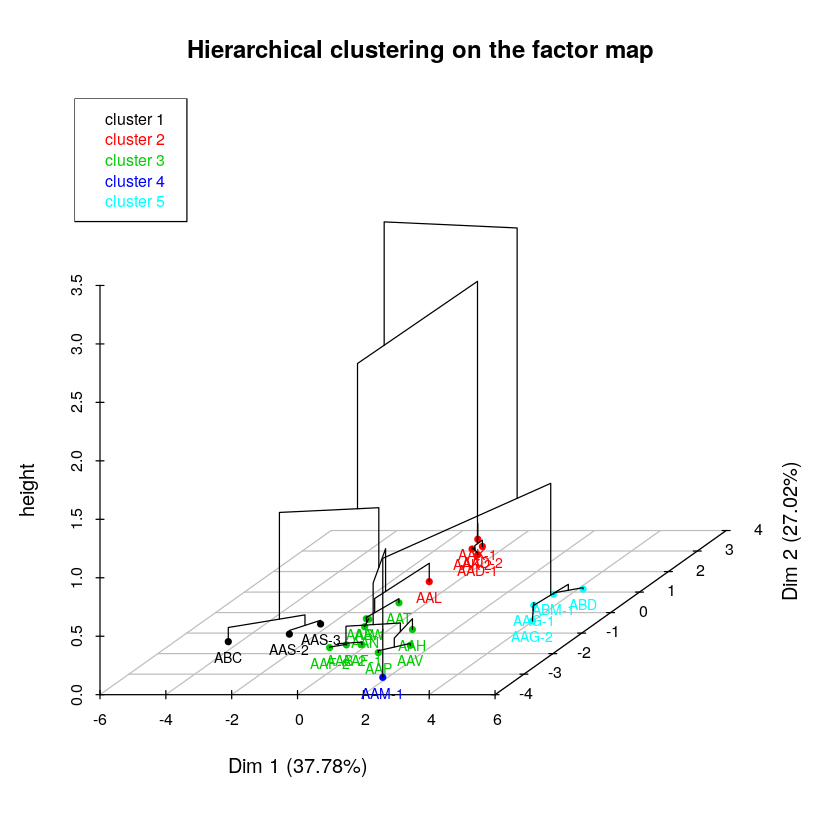

In [15]:
# Principal components + tree
plot(res.hcpc, choice = "3D.map")

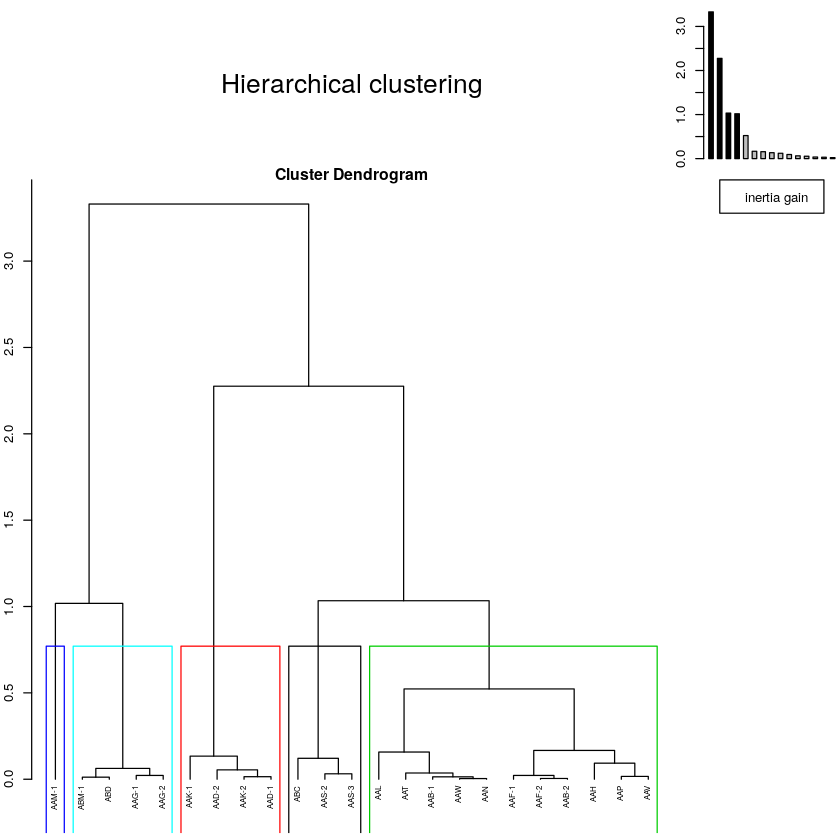

In [16]:
# Plot the dendrogram only
plot(res.hcpc, choice ="tree", cex = 0.6)

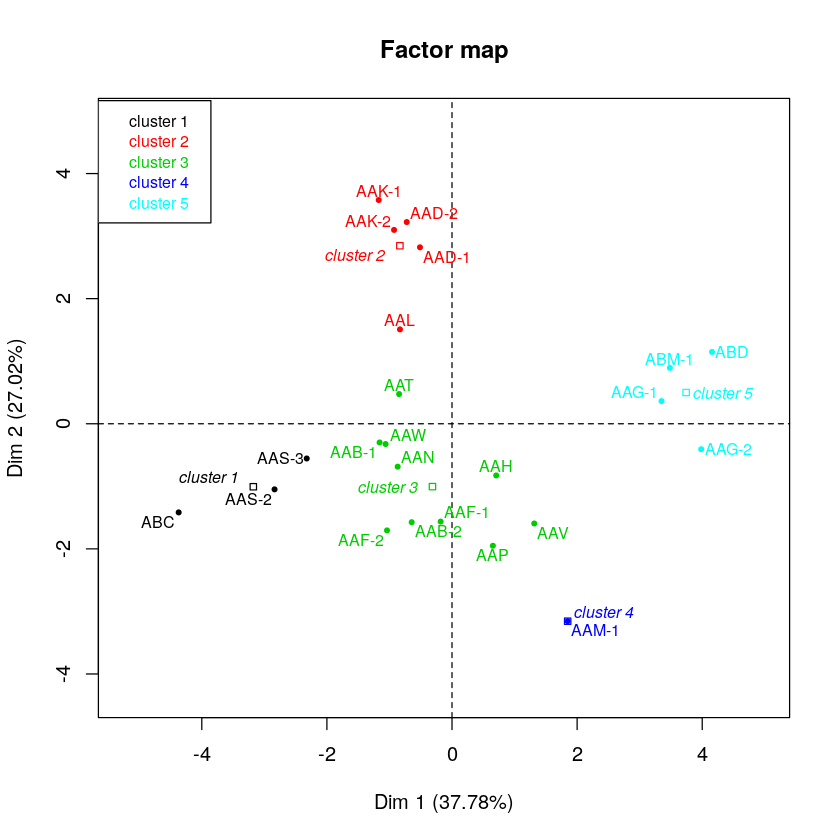

In [17]:
# Draw only the factor map
plot(res.hcpc, choice ="map", draw.tree = FALSE)

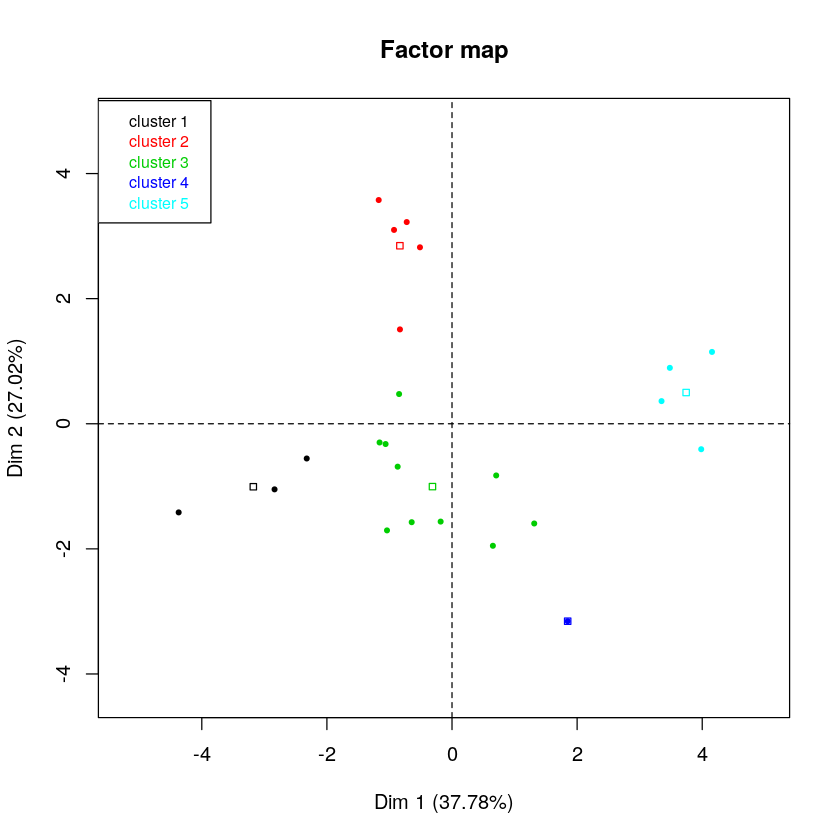

In [18]:
# Remove labels and add cluster centers
plot(res.hcpc, choice ="map", draw.tree = FALSE,
     ind.names = FALSE, centers.plot = TRUE)

Too few points to calculate an ellipse
Too few points to calculate an ellipse


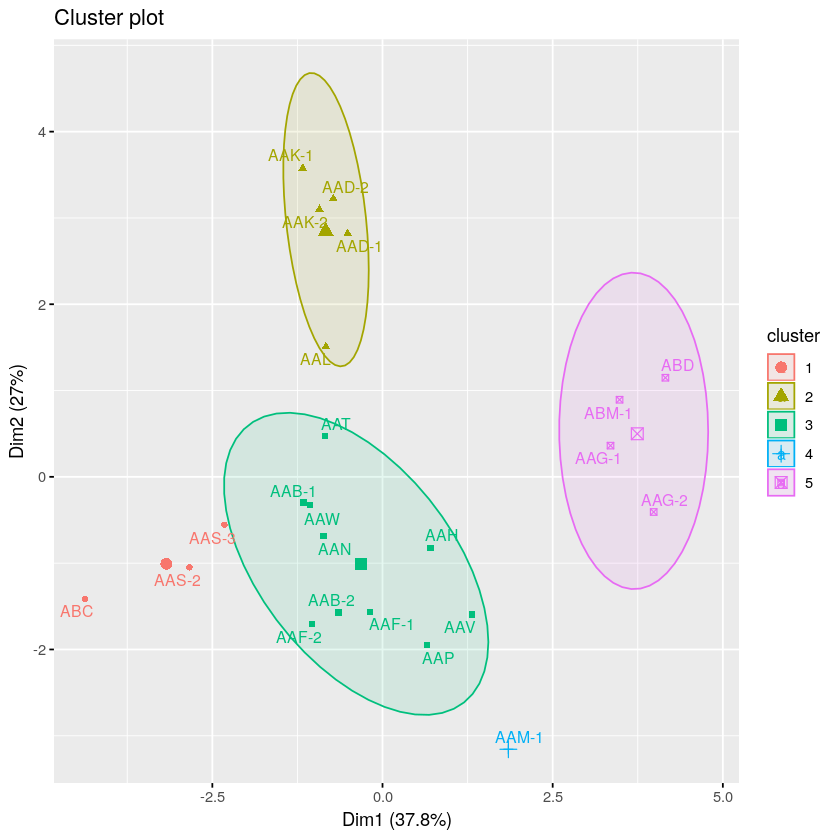

In [19]:
fviz_cluster(res.hcpc,choose.vars = NULL, stand = TRUE,
  axes = c(1, 2), geom = c("point", "text"), repel = TRUE,
  show.clust.cent = TRUE, ellipse = TRUE, ellipse.type = "t",
  ellipse.level = 0.9, ellipse.alpha = 0.1, shape = NULL,
  pointsize = 1.5, labelsize = 10, main = "Cluster plot", xlab = NULL,
  ylab = NULL, outlier.color = "black", outlier.shape = 10)

In [20]:
t.test(data_n[,14],conf.level = 0.99,mu=58.82)

ERROR: Error in `[.data.frame`(data_n, , 14): undefined columns selected


In [ ]:
fviz_pca_ind(res.pca,
             palette = c("#00AFBB",  "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             ellipse.type = "confidence",
             legend.title = "Groups",
             repel = TRUE
             )